# Simple Tutorial on How to Use the Model Provided in This Package

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from bnspopkne.kilonovae import Setzer2022_kilonova as saeev
from bnspopkne.kilonovae import Setzer2022_population_parameter_distribution as s22p
import sncosmo

In order to create an instance of the model, we actually do not need to specify any inputs. In that case, all parameters will be drawn from the distributions used in the accompanying paper.

In [9]:
test_inst = saeev()

Now we can see the values that each of the parameters of the model have taken.

In [10]:
# List out the parameters of the BNS mergers kilonova and binary inspiral
for i in range(12):
    print(f"{getattr(test_inst, f'param{i+1}_name')}: {getattr(test_inst, f'param{i+1}')}")

mass1: 1.4875160535234553
mass2: 1.3059260098629775
compactness1: 0.1854161262001593
compactness2: 0.1615651613640916
viewing_angle: 0.3920362572001852
electron_fraction: 0.35536710209229416
dynamical_ejecta_mass: 0.0029680130532762916
median_ejecta_velocity: 0.2387338866788694
grey_opacity: 1.9245781487789837
secular_ejecta_mass: 0.06599055034561604
total_ejecta_mass: 0.06895856339889234
disk_unbinding_efficiency: 0.37878807374858847


Of course, we can always specify any of these parameters ourselves. For example:

In [11]:
test_inst = saeev(mass1=1.35, mass2=1.35)

In [12]:
# List out the parameters of the BNS mergers kilonova and binary inspiral
for i in range(12):
    print(f"{getattr(test_inst, f'param{i+1}_name')}: {getattr(test_inst, f'param{i+1}')}")

mass1: 1.35
mass2: 1.35
compactness1: 0.16726128755607012
compactness2: 0.16726128755607012
viewing_angle: 0.9350569178421438
electron_fraction: 0.2415165699704116
dynamical_ejecta_mass: 0.0023929897684419003
median_ejecta_velocity: 0.2332274868584348
grey_opacity: 16.480289066102294
secular_ejecta_mass: 0.03606570951611948
total_ejecta_mass: 0.03845869928456138
disk_unbinding_efficiency: 0.2051203133820406


We can see that each intstance of the kilonova has different attributes:

In [13]:
test_inst.__dict__.keys()

dict_keys(['id', 'number_of_parameters', 'min_wave', 'max_wave', 'transient_duration', 'mass_ratio_threshold', 'EOS_path', 'emulator_path', 'opacity_data_path', 'param1_name', 'param2_name', 'param3_name', 'param4_name', 'param5_name', 'param6_name', 'param7_name', 'param8_name', 'param9_name', 'param10_name', 'param11_name', 'param12_name', 'param1', 'param2', 'param3', 'param4', 'param5', 'param6', 'param7', 'param8', 'param9', 'param10', 'param11', 'param12', 'phase', 'wave', 'flux', 'model', 'redshift', 'dist_mpc', 't0', 'tmax'])

Underneath this uses the frame of 'sncosmo.model' to handle the SED-timeseries for each realisation.

<IPython.core.display.Javascript object>


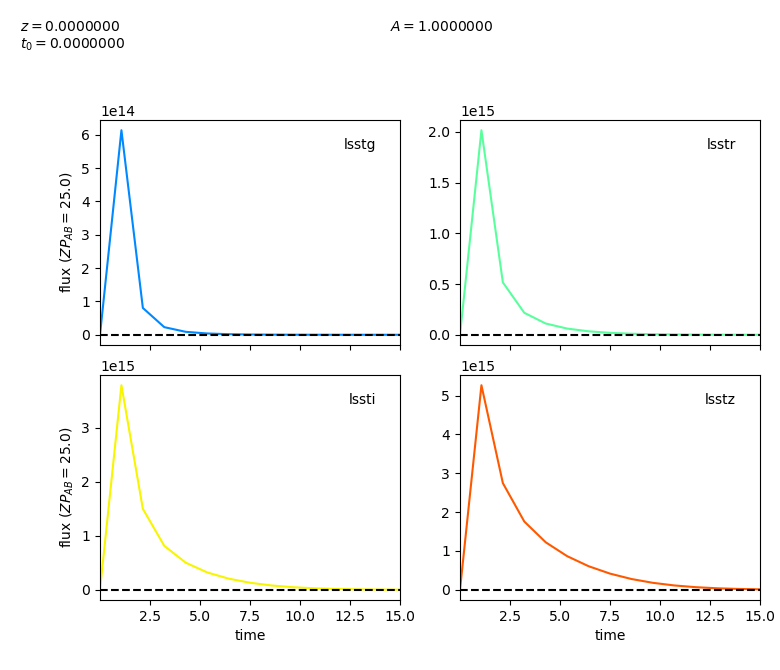

In [27]:
fig = sncosmo.plot_lc(model=test_inst.model, bands=['lsstg', 'lsstr', 'lssti','lsstz'])
plt.show()

We can also generate the distributions of parameters for a population of kilonovae.
If we want to also compute the lightcurve properties, this can be a computationally intensive task for a personal computer or laptop. That being said, in this example we will only generate a population of 1000 kilonovae, as opposed to 50000 that was used in the paper.

In [29]:
test_dist = s22p(population_size=1000, only_draw_parameters=False, chunk_size=100)

  0%|                                                        | 0/1000 [00:00<?, ?it/s]/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/cnsetzer/anaconda3/envs/kne_dev/lib/python3.9/site-packages/sncosmo/models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
100%|█████████████████████████████████████████████| 1000/1000 [14:47<00:00,  1.13it/s]


With this distribution generated, we can plot the parameter and lightcurve property distributions.

<IPython.core.display.Javascript object>


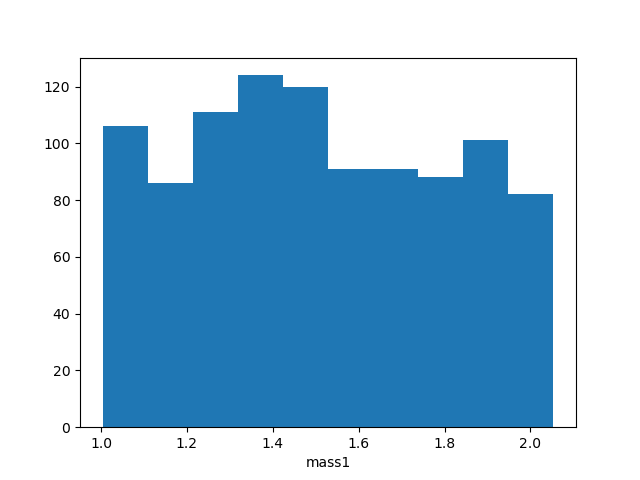

<IPython.core.display.Javascript object>


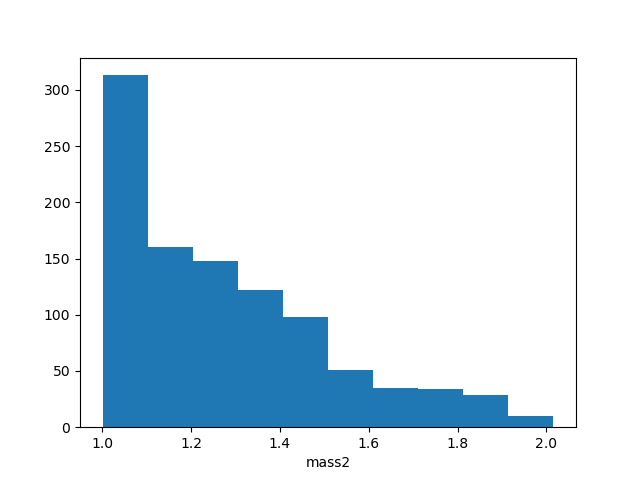

<IPython.core.display.Javascript object>


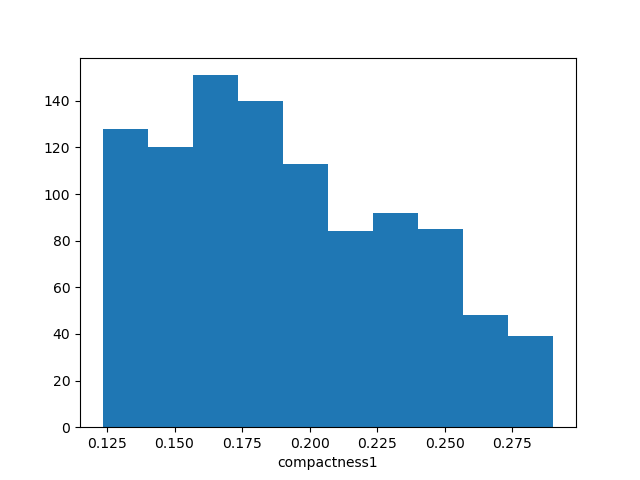

<IPython.core.display.Javascript object>


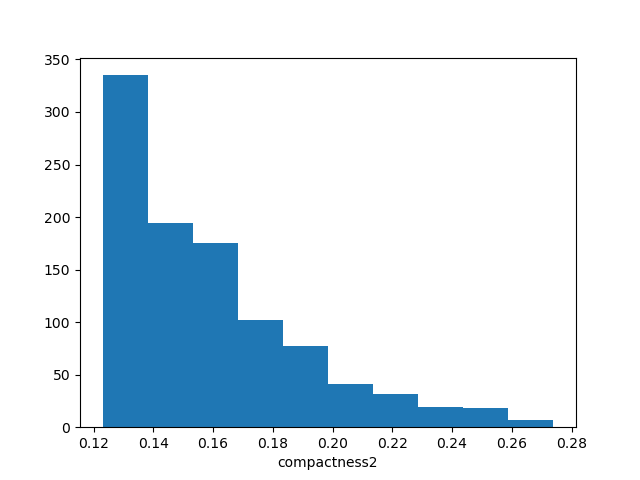

<IPython.core.display.Javascript object>


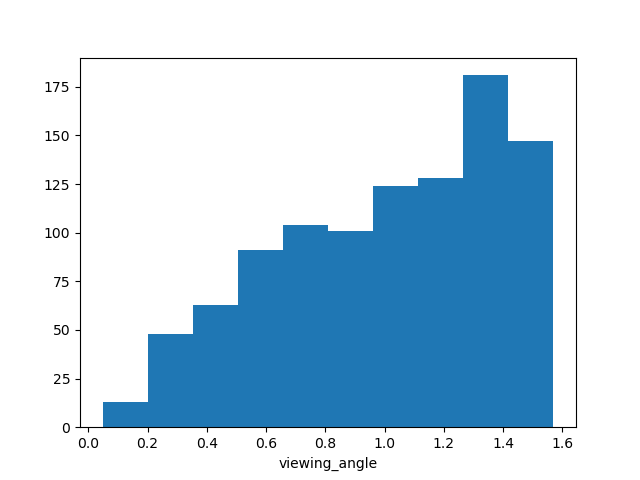

<IPython.core.display.Javascript object>


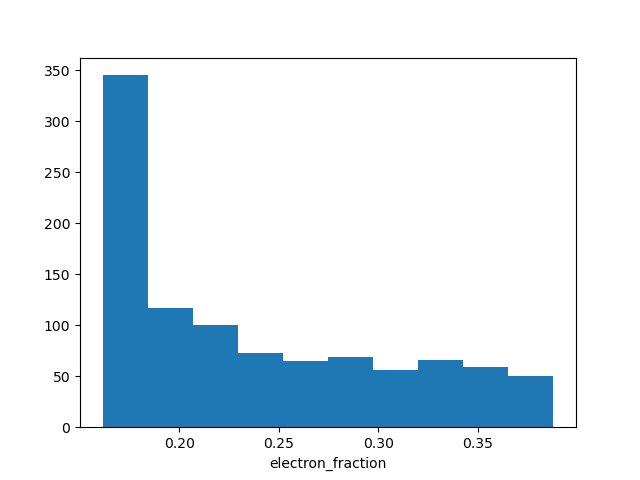

<IPython.core.display.Javascript object>


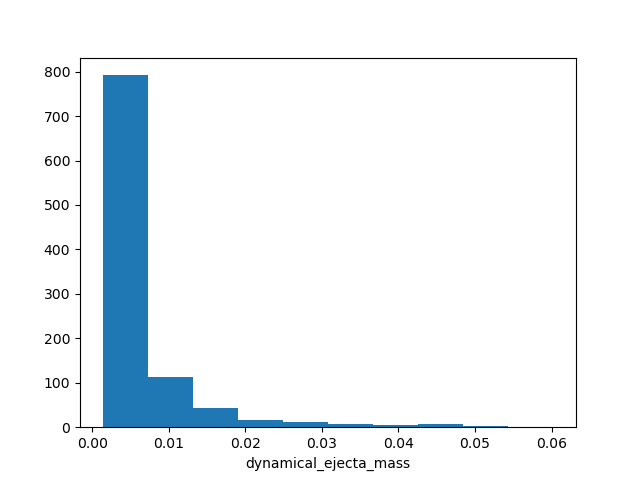

<IPython.core.display.Javascript object>


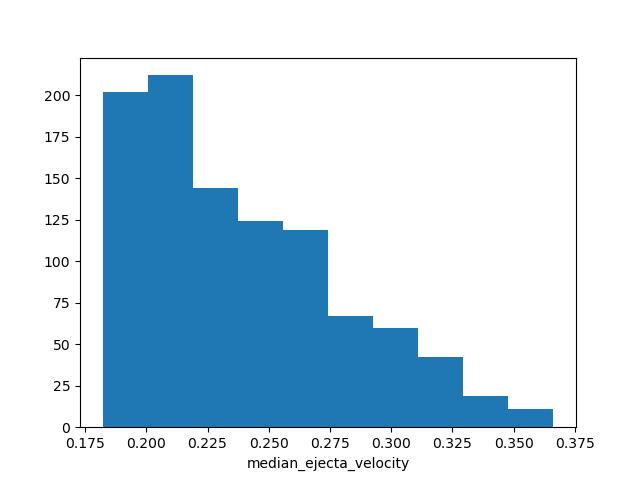

<IPython.core.display.Javascript object>


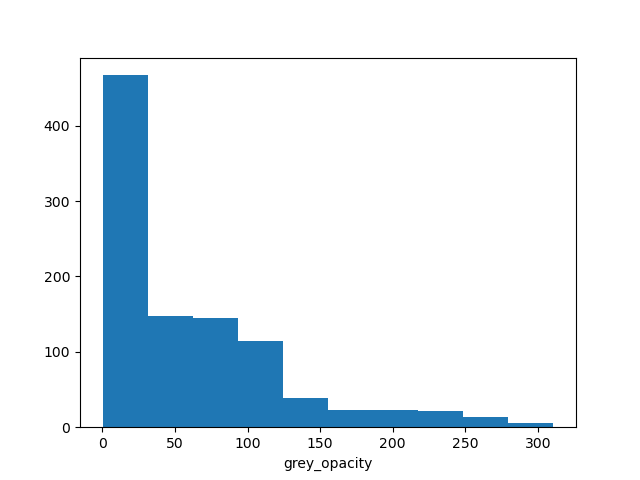

<IPython.core.display.Javascript object>


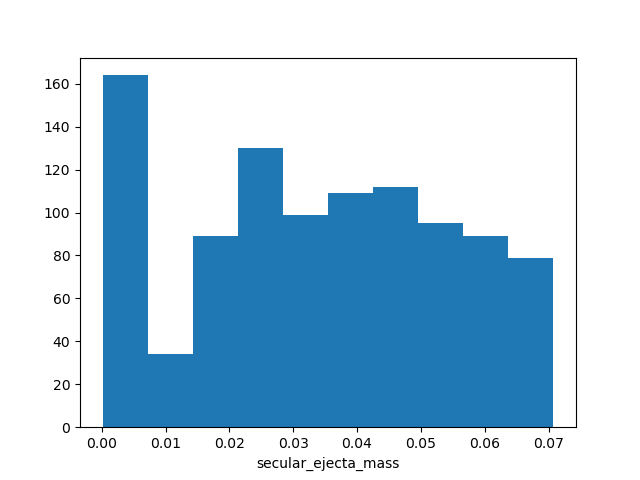

<IPython.core.display.Javascript object>


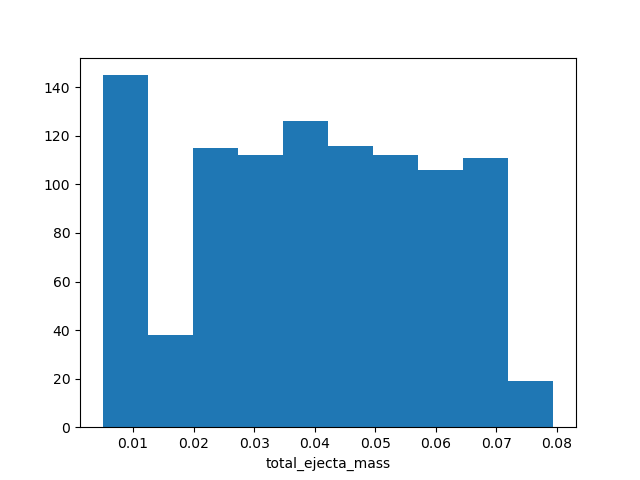

<IPython.core.display.Javascript object>


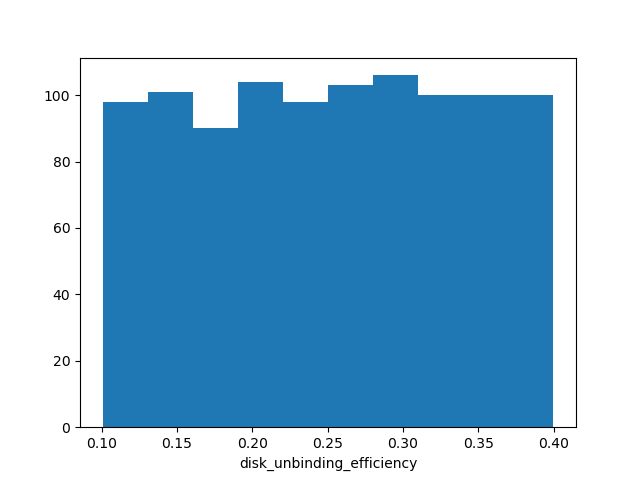

In [35]:
for i in range(12):
    plt.figure()
    plt.hist(getattr(test_dist, f'param{i+1}'))
    plt.xlabel(getattr(test_dist, f'param{i+1}_name'))
    plt.show()

<IPython.core.display.Javascript object>


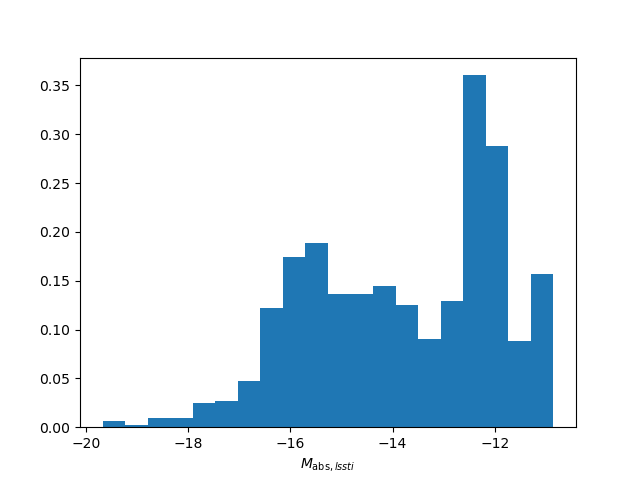

In [36]:
plt.figure()
plt.hist(test_dist.peak_absmag_lssti, bins=20, density=True)
plt.xlabel(r'$M_\mathrm{abs, {\it lssti}}$')
plt.show()

<IPython.core.display.Javascript object>


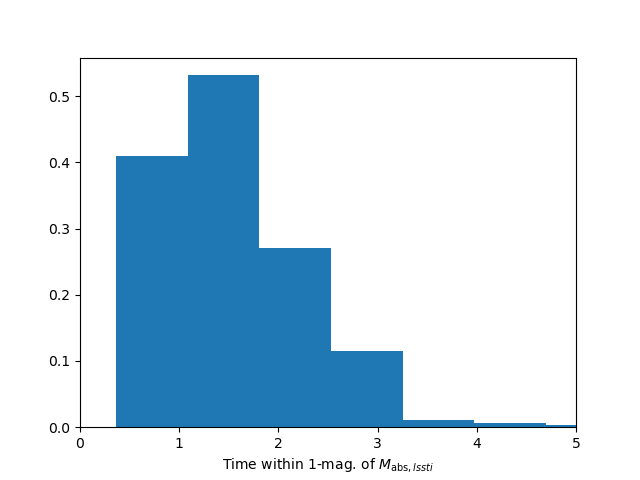

In [41]:
plt.figure()
plt.hist(test_dist.one_mag_peak_time_lssti, bins=20, density=True)
plt.xlabel(r'Time within 1-mag. of $M_\mathrm{abs, {\it lssti}}$')
plt.xlim(0,5)
plt.show()

Note, a rare few high-opacity kilonovae have nearly flat evolution which can be seen above as those that spend significantly long amounts of time, >~5 days, within 1 magnitude of the peak mag. These will all be unobservable unless exceptionally nearby.

<IPython.core.display.Javascript object>


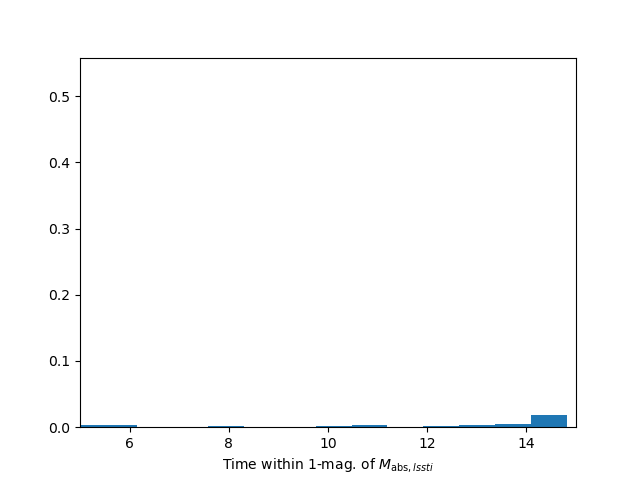

In [42]:
plt.figure()
plt.hist(test_dist.one_mag_peak_time_lssti, bins=20, density=True)
plt.xlabel(r'Time within 1-mag. of $M_\mathrm{abs, {\it lssti}}$')
plt.xlim(5,15)
plt.show()

We can also make scatter plots like in the paper of the distributed parameters.

<IPython.core.display.Javascript object>


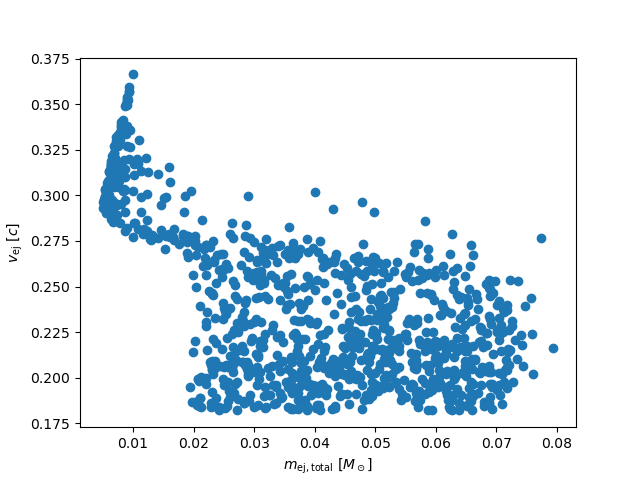

In [38]:
# ejecta parameter scatterplot
plt.figure()
plt.scatter(test_dist.param11, test_dist.param8)
plt.xlabel(r'$m_\mathrm{ej,total}$ [$M_\odot$]')
plt.ylabel(r'$v_\mathrm{ej}$ [$c$]')
plt.show()